Janhavi Shinde

Roll No. DS24MS14

Yes Bank Stock Price prediction

Problem Statement-
Yes Bank is a popular bank in India, but since 2018, it has been in the news because of a fraud case involving Rana Kapoor. 
This event raised curiosity about how such news affects the bank's stock prices. The dataset you have contains monthly details 
of Yes Bank’s stock prices — including the opening, closing, highest, and lowest prices — from the time the bank started. The main
goal is to use this data to predict the closing stock price for each month. We also want to explore whether time series models or
other prediction methods can accurately forecast these prices, even during unusual events like fraud news

import packages

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Load dataset

In [6]:
df = pd.read_csv("data_YesBank.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [13]:

df.shape

(185, 5)

Changing the datatype of Date column to datetime and extracting the day, month and year

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format = '%b-%y')

In [11]:
import datetime as dt

In [12]:
df["Date"].dt.year
df["Date"].dt.month
df["Date"].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
180    1
181    1
182    1
183    1
184    1
Name: Date, Length: 185, dtype: int32

In [14]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day_name()

In [15]:
df['day_of_week'] = df['Date'].dt.dayofweek

In [16]:
df.head()

,Date,Open,High,Low,Close,year,month,day,day_of_week
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,Friday,4
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,Monday,0
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,Thursday,3
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,Saturday,5
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,Tuesday,1


Data Preprocessing

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
year           0
month          0
day            0
day_of_week    0
dtype: int64

In [19]:
df.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
year                    int32
month                   int32
day                    object
day_of_week             int32
dtype: object

In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,185,2013-03-01 19:04:12.972973056,2005-07-01 00:00:00,2009-05-01 00:00:00,2013-03-01 00:00:00,2017-01-01 00:00:00,2020-11-01 00:00:00,NaN
Open,185.0,105.541405,10.0,33.8,62.98,153.0,369.95,98.87985
High,185.0,116.104324,11.24,36.14,72.55,169.19,404.0,106.333497
Low,185.0,94.947838,5.55,28.51,58.0,138.35,345.5,91.219415
Close,185.0,105.204703,9.98,33.45,62.54,153.3,367.9,98.583153
year,185.0,2012.702703,2005.0,2009.0,2013.0,2017.0,2020.0,4.471315
month,185.0,6.567568,1.0,4.0,7.0,10.0,12.0,3.446332
day_of_week,185.0,3.054054,0.0,1.0,3.0,5.0,6.0,2.001982


In [21]:
df = df.drop(columns=['Date'])
df = df.drop(columns=['day'])

In [22]:
df.head()

,Open,High,Low,Close,year,month,day_of_week
0,13.00,14.00,11.25,12.46,2005,7,4
1,12.58,14.88,12.55,13.42,2005,8,0
2,13.48,14.87,12.27,13.30,2005,9,3
3,13.20,14.47,12.40,12.99,2005,10,5
4,13.35,13.88,12.88,13.41,2005,11,1


Exploratory Data Analysis (EDA)
Univariate analysis
1. Histogram 

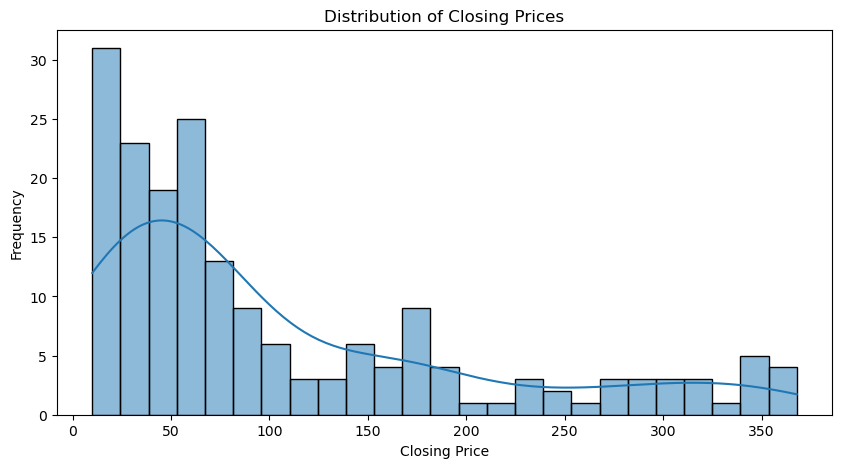

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(df['Close'],kde=True,bins=25)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()


Right-skewed - meaning that most of the closing prices are on the lower end, while fewer data points have very high closing prices.

2. Bar Plot 

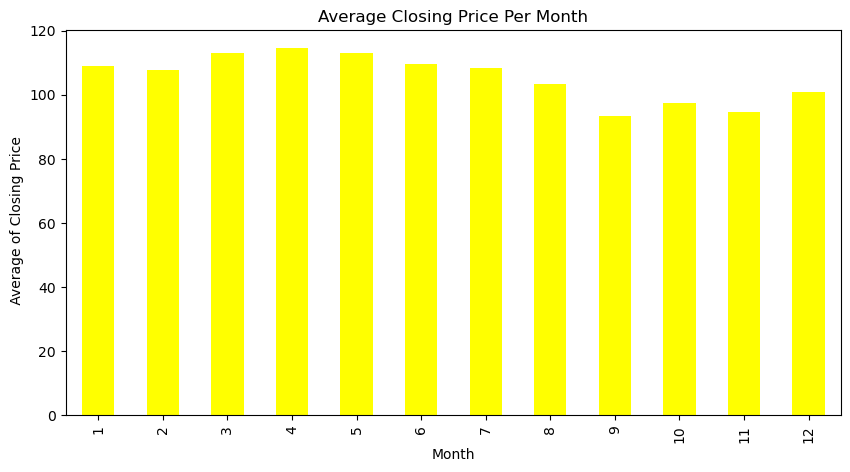

In [28]:
monthly_avg=df.groupby('month')['Close'].mean()
monthly_avg.plot(kind='bar',figsize=(10,5), color = 'yellow')
plt.title("Average Closing Price Per Month")
plt.ylabel(" Average of Closing Price")
plt.xlabel("Month")
plt.show()

Month April have highest closing price while September shows lowest closing price

3. Pie Chart

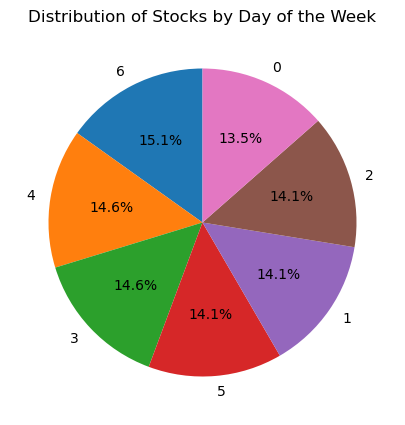

In [29]:
plt.figure(figsize = (10,5))
df['day_of_week'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Stocks by Day of the Week')
plt.ylabel('')
plt.show()

Distribution of the stock prices across all days of week is almost balanced

Bivariate Analysis

1. Scatter plot

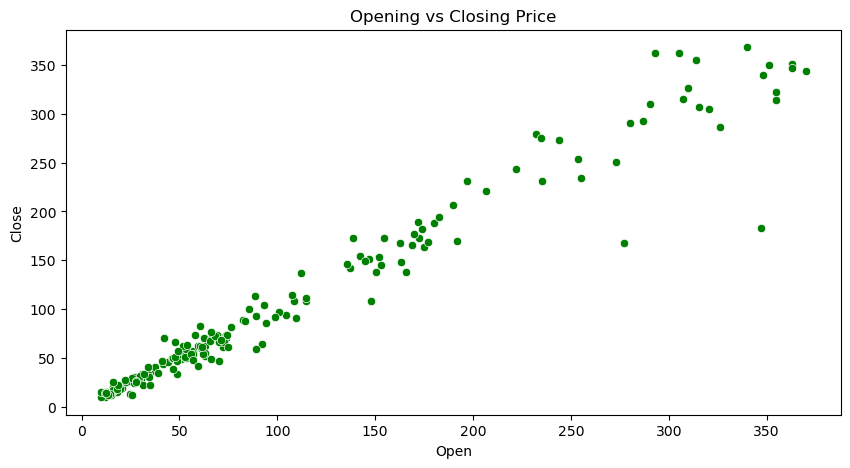

In [32]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='Open', y='Close', data=df, color ='green')
plt.title('Opening vs Closing Price')
plt.show()

Opening and closing price shows positive correlation

2. Scatter plot for Highest vs Lowest price

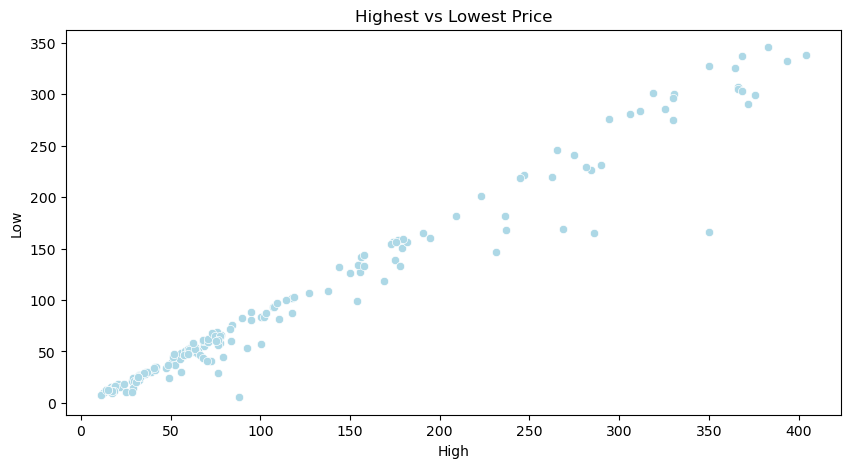

In [34]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='High', y='Low', data=df, color ='lightblue')
plt.title('Highest vs Lowest Price')
plt.show()

strong positive correlation between high and low prices.

Multivariate Analysis

Line Graph

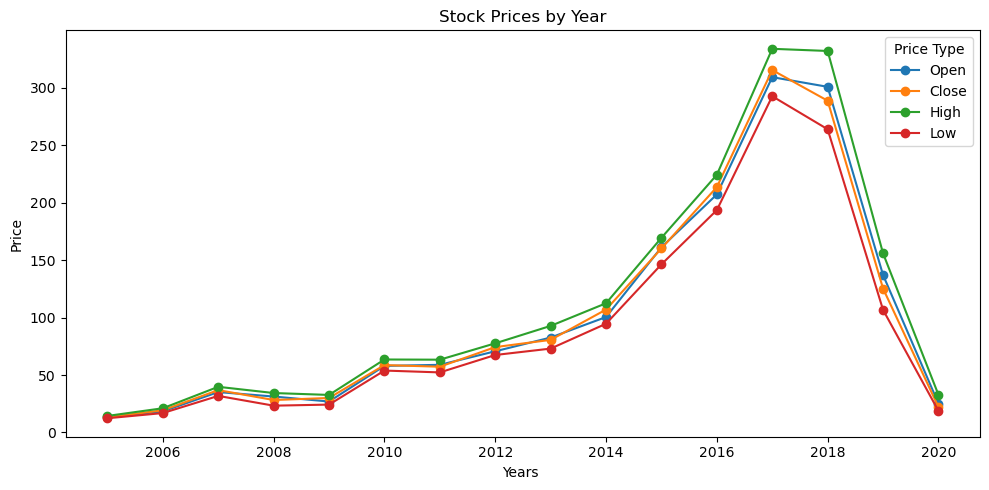

In [36]:
grouped = df.groupby('year')[['Open', 'Close', 'High', 'Low']].mean()
grouped.plot(kind='line',figsize=(10,5), marker='o')
plt.title('Stock Prices by Year')
plt.xlabel('Years ')
plt.ylabel('Price')
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

The Opening, Closing, Lowest and Highest stock prices of Yes Bank moved closely together.
It goes consistently upward trend until approx. 2017 then followed by a sharp decline.
Showing stock prices peaked in year range 2016 to 2018.

Correlation Analysis

In [37]:
float_dtype =  df.select_dtypes(include = 'float')
float_dtype.head()

,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41


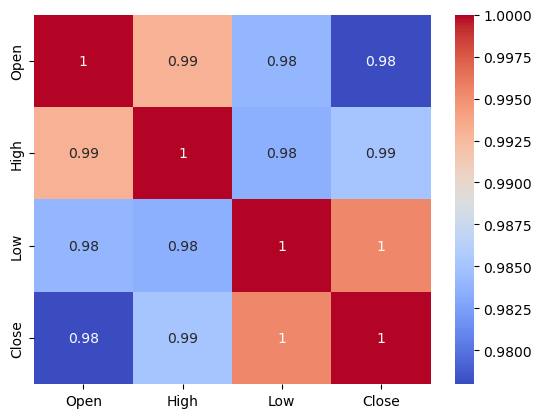

In [39]:
sns.heatmap(float_dtype.corr(), annot=True, cmap="coolwarm")
plt.show()

The heatmap shows a positive correlation between all the variables in the dataset.

Outlier Detections

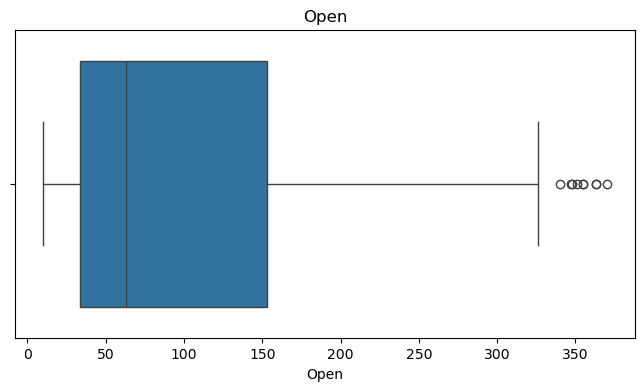

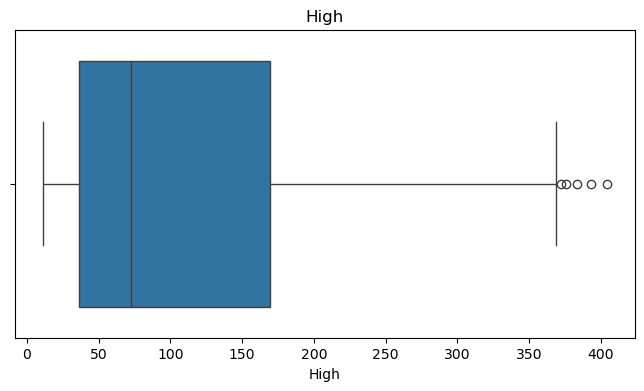

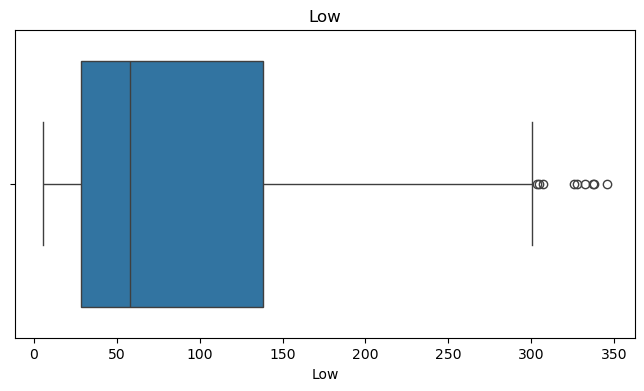

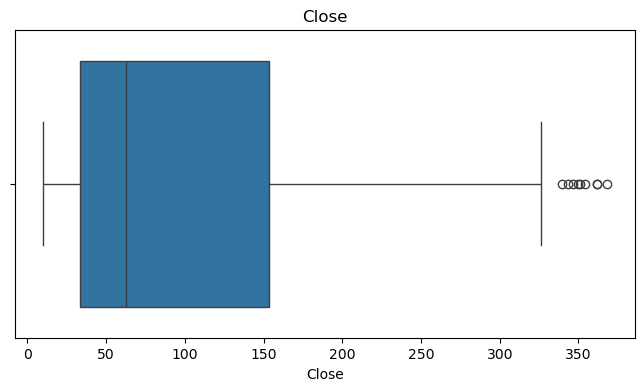

In [40]:
for i in float_dtype.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

Model Preparation 

In [42]:
x = df.drop(['Close'], axis = 1).values
y = df['Close'].values


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [45]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(x_test)
y_pred

array([ 26.66270477,  69.32713422,  72.6953213 ,  25.40766747,
        14.53343236,  15.0184252 ,  39.47485126,  63.35033651,
        47.6400409 ,  25.82424591, 342.47298124, 165.54003301,
       323.73162497,  33.88218474,  64.42210855,  13.71492378,
       152.25710442,  93.95918919, 187.14667582,  52.92703535,
       168.99889641, 185.61737696, 127.72252509, 301.58308856,
        15.65635391, 106.04823351,  59.61685088,  33.89403534,
        10.89042694, 176.3598204 ,  21.63964001, 294.84620912,
       372.67503042,  38.92424442,  14.40352213,  50.3119586 ,
        23.09534539,  63.05651032,  26.64026733,  43.84125295,
       263.78997852,  13.53693314, 101.25793418, 292.17462937,
        60.37951713, 108.25690801, 167.18506189, 242.70832897,
        82.05608201,  52.06065266, 126.13210212, 370.16755234,
        73.09165092,  12.35217992, 148.69407363,  75.82526235])

In [49]:
y_train

array([142.08,  64.76,  33.75,  54.5 ,  52.59,  33.51,  50.97,  26.85,
       145.92,  13.71,  18.46,  49.42,  16.12,  22.45, 100.28, 314.35,
        13.41,  67.83,  15.45,  51.29,  57.1 ,  74.02,  33.45, 194.3 ,
        12.46,  60.95,  65.97,  28.14,  12.42, 145.23,  15.62,  25.6 ,
        46.18,  43.48,  50.54, 361.96,  62.13, 172.5 , 351.15,  92.84,
        69.14,  34.06,  61.02,  61.59,  73.76,  10.26,  62.38,  53.83,
        57.57, 206.39,  88.14, 309.82, 362.05, 188.73, 253.52, 172.91,
       250.85,  28.63,  12.24, 108.7 , 154.57,  12.99,  61.98,  49.81,
        20.08, 188.05, 169.65,  14.67,  24.13,  85.71,  19.49,  29.68,
        15.33, 108.38, 221.3 , 231.2 , 304.9 ,  62.22, 114.33,  73.74,
        91.3 ,  70.07, 350.  , 306.8 ,  55.61,  50.57,  73.46,  12.26,
        47.32,  40.99,  62.9 ,  97.49, 137.67, 111.7 ,  34.55,  25.32,
        30.31,  30.16,  58.99,  60.07,  70.45,  26.83,  57.5 , 231.26,
       346.2 ,  88.48, 275.05, 322.25,  39.2 ,  31.93, 151.82,  47.72,
      

In [50]:
x_train

array([[ 0.3682367 ,  0.30039706,  0.44322346,  0.33456097,  1.27208952,
         1.06925404],
       [-0.10281056, -0.12159197, -0.39483019,  0.10741168,  0.15955021,
        -1.43863271],
       [-0.56121226, -0.62107335, -0.77163473, -1.02833477, -0.9529891 ,
         1.06925404],
       [-0.48639267, -0.51264225, -0.46783607, -0.3468869 ,  0.71581986,
         0.06609934],
       [-0.41283764, -0.47908486, -0.48813417, -0.3468869 , -1.50925875,
         1.06925404],
       [-0.75342483, -0.74482835, -0.71556262, -1.25548406, -0.39671944,
        -0.93705536],
       [-0.57280402, -0.59042556, -0.51157231, -0.57403619, -0.9529891 ,
        -1.43863271],
       [-0.78356342, -0.7888603 , -0.75941101,  1.69745671, -0.39671944,
         0.56767669],
       [ 0.35253513,  0.41280462,  0.38221701,  0.56171026,  0.71581986,
        -0.93705536],
       [-0.93436177, -0.95528944, -0.89622694, -1.70978264,  1.55022434,
         0.06609934],
       [-0.88683553, -0.91222736, -0.85361214, -1.

Checking accuracy

In [51]:
print("Trainig Score: ",(lr.score(x_train, y_train))*100,"%")
print("Testing Score: ",(lr.score(x_test, y_test))*100,"%")

Trainig Score:  99.45460265605342 %
Testing Score:  99.61402621958177 %


Scatter Plot

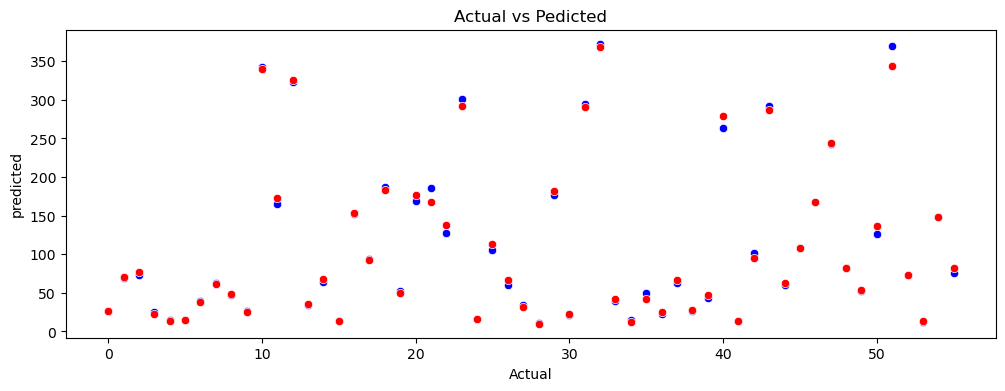

In [52]:
plt.figure(figsize=(12,4))
sns.scatterplot(y_pred, color='b')
sns.scatterplot(y_test,color='r')
plt.title('Actual vs Pedicted')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [53]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred.astype(int), 'Difference': y_test - y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
19,49.84,52,-3.087035
23,292.37,301,-9.213089
26,65.99,59,6.373149
5,14.37,15,-0.648425
47,243.44,242,0.731671
0,26.97,26,0.307295
14,68.30,64,3.877891
33,41.36,38,2.435756
31,290.56,294,-4.286209
46,167.96,167,0.774938


Evaluation Matrics

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",MAE)

MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MAE : 4.014530905217206
MSE : 39.255523804241015
RMSE : 6.265422875133091
R2 Linear regression : 99.61402621958177


Random Forest 

In [55]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(x_train,y_train)
rf_pred = random_forest.predict(x_test)

MSE = mean_squared_error(y_test, rf_pred)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

r2 = r2_score(y_test, rf_pred)
print("R2 for Random Forest :", r2*100)

MSE : 262.03164916346253
RMSE : 16.18739167264024
R2 for Random Forest : 97.4236149103195


In [56]:
print("Trainig Score: ",(random_forest.score(x_train, y_train))*100,"%")
print("Testing Score: ",(random_forest.score(x_test, y_test))*100,"%")

Trainig Score:  99.77135923558757 %
Testing Score:  97.4236149103195 %


In [57]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rf_pred, 'Difference': y_test - rf_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
21,168.00,239.451500,-71.451500
54,147.95,159.552500,-11.602500
1,70.30,65.333279,4.966721
53,13.58,20.031000,-6.451000
35,41.45,57.151083,-15.701083
46,167.96,168.632000,-0.672000
30,22.78,18.211000,4.569000
40,279.10,276.349500,2.750500
4,13.42,14.228467,-0.808467
24,16.16,15.547950,0.612050


Decision Tree 

In [58]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=14)

decision_tree.fit(x_train, y_train)
 
DT_pred = decision_tree.predict(x_test)
DT_train = decision_tree.predict(x_train)

MSE = mean_squared_error(y_test,DT_pred)
print("MSE:", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

r2 = r2_score(y_test, DT_pred)
print("R2 for Decision Tree Regressor : ", r2*100)


MSE: 819.3366589285715
RMSE : 28.62405734567641
R2 for Decision Tree Regressor :  91.94400081733883


In [59]:
print("Trainig Score: ",(decision_tree.score(x_train, y_train))*100,"%")
print("Testing Score: ",(decision_tree.score(x_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  91.94400081733883 %


In [60]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': DT_pred, 'Difference': y_test - DT_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
12,326.14,315.05,11.09
30,22.78,18.46,4.32
39,47.31,50.57,-3.26
11,172.55,163.31,9.24
50,136.83,111.70,25.13
28,9.98,10.26,-0.28
49,53.41,57.10,-3.69
31,290.56,250.85,39.71
32,367.90,361.96,5.94
13,35.98,34.55,1.43


Support Vector Machine (SVM)

In [61]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm = SVR( C=100, gamma=0.1, epsilon=0.1)

svm.fit(x_train, y_train)

y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)

MSE_test = mean_squared_error(y_test, y_test_pred)

RMSE_test = np.sqrt(MSE_test)

r2_test = r2_score(y_test, y_test_pred)
print(" MSE:", MSE_test)
print(" RMSE:", RMSE_test)
print(" R2:", r2_test * 100)

 MSE: 215.08860488367654
 RMSE: 14.665899388843377
 R2: 97.88517502999497


In [62]:
print("Trainig Score: ",(svm.score(x_train, y_train))*100,"%")
print("Testing Score: ",(svm.score(x_test, y_test))*100,"%")

Trainig Score:  99.08172850834251 %
Testing Score:  97.88517502999497 %


In [64]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_test_pred, 'Difference': y_test - y_test_pred})
predicted_value.sample(5)

,Actual Value,Predicted Value,Difference
39,47.31,42.663209,4.646791
29,181.75,164.082619,17.667381
32,367.90,337.233880,30.666120
20,176.52,178.972536,-2.452536
36,25.12,20.672715,4.447285


KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)  

knn.fit(x_train, y_train)
 
train_score = knn.score(x_train, y_train)  
test_score = knn.score(x_test, y_test)  


In [66]:
print("Training Score:", train_score * 100)  
print("Testing Score:", test_score * 100)

Training Score: 98.0270497797908
Testing Score: 94.08424728500371


Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
print("Training:", ((cross_val_score(knn, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(knn, x_test, y_test))*100).mean().astype(int), "%")


Training: 96 %
Testing: 90 %


Printing all the accuracies

In [68]:
all_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100),
                           'Random Forest Regressor': ((random_forest.score(x_train, y_train))*100, (random_forest.score(x_test, y_test))*100),
                           'Decision Tress Regressor': ((decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100),
                           'Support Vector Machine': ((svm.score(x_train, y_train))*100, (svm.score(x_test, y_test))*100),
                           'K Nearest Neighbor': ((knn.score(x_train, y_train))*100, (knn.score(x_test, y_test))*100),})
all_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,99.454603,99.614026
Random Forest Regressor,99.771359,97.423615
Decision Tress Regressor,100.000000,91.944001
Support Vector Machine,99.081729,97.885175
K Nearest Neighbor,98.027050,94.084247


Observation:

🔹 Linear Regression
Very high accuracy on both training and test sets.

Best generalization — likely a good fit for this data.

🔹 Random Forest Regressor
Excellent training score, slight drop on test score.

Mild overfitting, but still performs well.

🔹 Decision Tree Regressor
Perfect training, but test score drops.

Overfitting — memorizes training data, poor generalization.

🔹 Support Vector Machine
High and balanced performance.

Good generalization, slight improvement possible with tuning.

🔹 K-Nearest Neighbor
Decent accuracy but larger gap between training and test.

Some overfitting, sensitive to K and data scaling.